In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# %matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# %load_ext autoreload
# %autoreload 2

In [2]:
np.random.seed(1)
train_x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,0, 0, 1, 1, 0,0, 0, 1, 1, 1,0, 1, 0, 0, 0,0, 1, 0, 0, 1,0, 1, 0, 1, 0,0, 1, 0, 1, 1,0, 1, 1, 0, 0,0, 1, 1, 0, 1,0, 1, 1, 1, 0,0, 1, 1, 1, 1,1, 0, 0, 0, 0,1, 0, 0, 0, 1,1, 0, 0, 1, 0,1, 0, 0, 1, 1,1, 0, 1, 0, 0,1, 0, 1, 0, 1,1, 0, 1, 1, 0,1, 0, 1, 1, 1,1, 1, 0, 0, 0,1, 1, 0, 0, 1,1, 1, 0, 1, 0,1, 1, 0, 1, 1,1, 1, 1, 0, 0,1, 1, 1, 0, 1,1, 1, 1, 1, 0,1, 1, 1, 1, 1,]).reshape(32, 5)
#train_x = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,0, 0, 1, 1, 0,0, 1, 0, 0, 1,0, 1, 0, 1, 0,0, 1, 0, 1, 1,0, 1, 1, 0, 0,0, 1, 1, 0, 1,0, 1, 1, 1, 0,0, 1, 1, 1, 1,1, 0, 0, 0, 0,1, 0, 0, 0, 1,1, 0, 1, 0, 0,1, 0, 1, 0, 1,1, 0, 1, 1, 0,1, 0, 1, 1, 1,1, 1, 0, 0, 0,1, 1, 0, 0, 1,1, 1, 0, 1, 0,1, 1, 0, 1, 1,1, 1, 1, 0, 0,1, 1, 1, 0, 1,1, 1, 1, 1, 0,1, 1, 1, 1, 1,]).reshape(28, 5)
train_x = train_x.T
#test_x = np.array([0, 0, 1, 1, 1,0, 1, 0, 0, 0,1, 0, 0, 1, 0,1, 0, 0, 1, 1]).reshape(5, 4)
train_y = np.array([1, 1, 1, 1, 1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 0]).reshape(1, 32)
#train_y = np.array([1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 1,1, 1, 1, 0]).reshape(1, 28)
#test_y = np.array([1, 1, 1, 1]).reshape(1, 4)
print(np.shape(train_x))
print(np.shape(train_y))
threshold = 0.6

(5, 32)
(1, 32)


In [0]:
def init_params(dims):
    params = {}
    np.random.seed(3)
    for i in range (1, len(dims)):
        params["W" + str(i)] = (np.random.randn(dims[i], dims[i-1]) * 0.01).astype('float32')
        params["b" + str(i)] = np.zeros((dims[i], 1)).astype('float32')
    return params

In [0]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [0]:
def forward_prop(X, Y, params):
    L = len(params) // 2
    A = X
    caches = []
    for i in range(1, L+1):
        A_prev = A
        W = params["W" + str(i)]
        b = params["b" + str(i)]
        Z = np.dot(W, A_prev) + b
        linear_cache = (A_prev, W, b)
        A = sigmoid(Z)
        activation_cache = Z
        caches.append((linear_cache, activation_cache))  
    #Amat = (A > threshold).astype(int)
    #A = Amat
    return A, caches

In [0]:
def compute_cost(Y, AL):
    m = Y.shape[1]
    J = (-1/m) * np.sum(Y * np.log(AL) + (1 - Y) * np.log(1 - AL))
    #J = (1/m) * np.sum((Y - AL) * (Y - AL))
    return np.squeeze(J)

In [0]:
def sigmoid_backward(dA, Z):
    s = 1 / (1 + np.exp(-Z))
    dZ = dA * s * (1-s)
    return dZ

In [0]:
def backward_prop(AL, Y, caches):
    L = len(caches)
    m = AL.shape[1]
    Y = Y.reshape(AL.shape)
    grads = {}
    dAL = (AL - Y)
    #dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    for i in range(L, 0, -1):
        current_cache = caches[i-1]
        linear_cache, activation_cache = current_cache
        if(i == L):
            dZ = sigmoid_backward(dAL, activation_cache)
        else:
            dZ = sigmoid_backward(grads["dA" + str(i+1)], activation_cache)
        A_prev, W, b = linear_cache
        grads["dW" + str(i)] = (1/m) * np.dot(dZ, A_prev.T)
        grads["db" + str(i)] = (1/m) * np.sum(dZ, axis=1, keepdims=True)        
        grads["dA" + str(i)] = np.dot(W.T, dZ)
    return grads

In [0]:
def update_params(params, grads, learning_rate):
    L = len(params) // 2
    for l in range(1, L+1):
        params["W" + str(l)] -= learning_rate * grads["dW" + str(l)]
        params["b" + str(l)] -= learning_rate * grads["db" + str(l)]   
    return params

In [0]:
def NN_model(X, Y, dims, learning_rate = 0.3, num_itrs = 3000, print_cost = False):
    np.random.seed(1)
    params = init_params(dims)
    costs = []
    for i in range(num_itrs):   
        AL, caches = forward_prop(X, Y, params)
        cost = compute_cost(Y, AL)
        grads = backward_prop(AL, Y, caches)
        params = update_params(params, grads, learning_rate)
        if(i % 100 == 0):
            #if (i != 0):
            #  costs.append(cost)
            costs.append(cost)
            if(print_cost):
                print("Iteration #%i : %f" % (i, cost))
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    return params

In [0]:
def predict(X, Y, params):
    predictions = np.zeros((1, Y.shape[1]))
    actual = np.zeros((1, Y.shape[1]))
    y, caches = forward_prop(X, Y, params)
    correct = 0
    for i in range(y.shape[1]):
        if(y[0, i] >= threshold):
            predictions[0, i] = 1
        else:
            predictions[0, i] = 0
        if (predictions[0, i] == Y[0, i]):
          correct = correct + 1
    print("Accuracy : " + str(correct / X.shape[1]))
    return predictions

Iteration #0 : 0.680250
Iteration #100 : 0.576689
Iteration #200 : 0.499523
Iteration #300 : 0.441760
Iteration #400 : 0.397864


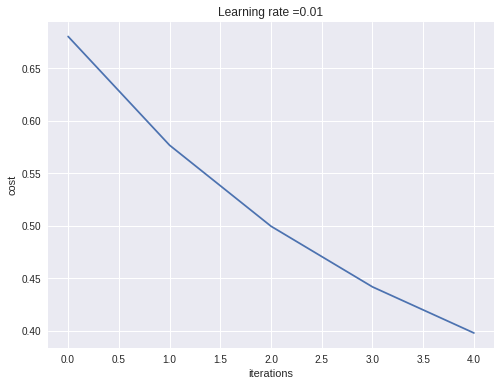

In [12]:
dims = [5, 5, 5, 1]
params = NN_model(train_x, train_y, dims, learning_rate = 0.01, num_itrs = 500, print_cost=True)

In [13]:
predictions_train = predict(train_x, train_y, params)
#predictions_test = predict(test_x, test_y, params)

Accuracy : 0.96875
